<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла." data-toc-modified-id="Изучение-данных-из-файла.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла.</a></span><ul class="toc-item"><li><span><a href="#Вывод." data-toc-modified-id="Вывод.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод.</a></span></li></ul></li><li><span><a href="#Предобработка-данных." data-toc-modified-id="Предобработка-данных.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных.</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Составьте-портрет-пользователя-каждого-региона." data-toc-modified-id="Составьте-портрет-пользователя-каждого-региона.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Составьте портрет пользователя каждого региона.</a></span></li><li><span><a href="#Проверьте-гипотезы" data-toc-modified-id="Проверьте-гипотезы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверьте гипотезы</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span><ul class="toc-item"><li><span><a href="#Портрет-пользователя-по-продажам-в-регионах:" data-toc-modified-id="Портрет-пользователя-по-продажам-в-регионах:-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Портрет пользователя по продажам в регионах:</a></span></li><li><span><a href="#Портрет-пользователя-по-жанрам-в-регионах:" data-toc-modified-id="Портрет-пользователя-по-жанрам-в-регионах:-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Портрет пользователя по жанрам в регионах:</a></span></li><li><span><a href="#Категории-за-последние-5-лет:" data-toc-modified-id="Категории-за-последние-5-лет:-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Категории за последние 5 лет:</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Изучение закономерностей, определяющих успешность игр.
# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Изучение данных из файла.

Импортируем библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats as st
import seaborn as sns
cm = sns.light_palette("red", as_cmap=True)

Откроем файл.

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
for row in data: 
    print(data[row].value_counts()) 

Need for Speed: Most Wanted          12
Ratatouille                           9
LEGO Marvel Super Heroes              9
FIFA 14                               9
Madden NFL 07                         9
                                     ..
Imagine: Soccer Captain               1
Justice League Heroes: The Flash      1
Otometeki Koi Kakumei * Love Revo     1
Shin Megami Tensei                    1
Disney Channel Collection Vol. 1      1
Name: Name, Length: 11559, dtype: int64
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    100

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


### Вывод.

Датасет состоит из 11 столбцов и 16715 строк. Пропущенные значения в столбцах Name(2), Genre(2), Year_of_Release(269), Critic_Score(8578), User_Score(6701) и аббревиатура 'tbd'(2424), Rating(6766), полных дубликатов нет. Нули есть по продажам в странах. Преобразовать в нужные типы данных, заменить названия столбцов к нижнему регистру.

##  Предобработка данных.
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
   - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
   - Опишите причины, которые могли привести к пропускам;
   - Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

- Заменим названия столбцов, приведите к нижнему регистру.

In [9]:
data.columns = data.columns.str.lower()
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()
data['rating'] = data['rating'].str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


- Преобразуем данные в нужные типы.

In [10]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


- Обработаем пропуски.

In [11]:
data.isnull().sum().sort_values(ascending = False) / data.shape[0] * 100

critic_score       51.319174
rating             40.478612
user_score         40.089740
year_of_release     1.609333
genre               0.011965
name                0.011965
other_sales         0.000000
jp_sales            0.000000
eu_sales            0.000000
na_sales            0.000000
platform            0.000000
dtype: float64

Посмотрели в процентах,сколько данных пропущено. Все,что меньше 5% удалим.

In [12]:
data.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

В столбце 'user_score' значение 'tbd',удаляем его.

In [13]:
tbd = data['user_score'] != 'tbd'
data['user_score'].where(tbd, np.nan, inplace=True)
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [14]:
data['user_score'] = data['user_score'].astype('float64')
median_user_score = data.groupby('critic_score')['user_score'].transform('median') 
data['user_score'].fillna(median_user_score,inplace=True) 
median_user_score = data.groupby('rating')['user_score'].transform('median') 
data['user_score'].fillna(median_user_score,inplace=True)
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6580
rating             6676
dtype: int64

Меняем пустые значения в столбце 'user_score' на медиану по столбцу 'critic_score', затем по 'rating'(рейтинги).Осталось 6580

In [15]:
median_critic_score = data.groupby('user_score')['critic_score'].transform('median') 
data['critic_score'].fillna(median_critic_score,inplace=True) 
median_critic_score = data.groupby('rating')['critic_score'].transform('median') 
data['critic_score'].fillna(median_critic_score,inplace=True)
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       6580
user_score         6580
rating             6676
dtype: int64

Меняем пустые значения в столбце 'critic_score' на медиану по столбцу 'user_score', затем по 'rating'(рейтинги).Осталось 6580. Оставим так.

- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [16]:
data['na_sales'].sum()

4341.42

In [17]:
data['eu_sales'].sum()

2399.6800000000003

In [18]:
data['jp_sales'].sum()

1290.6399999999999

In [19]:
data['other_sales'].sum()

782.63

По суммам продаж лидирует Северная Америка(вот где геймеры).

In [20]:
data['sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [21]:
data.duplicated().sum()

0

Привели данные в нормальный вид. Сильно не трогали рейтинг, потому что это индивидуально.

## Исследовательский анализ данных
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

- Посмотрим, сколько игр выпускалось в разные годы.

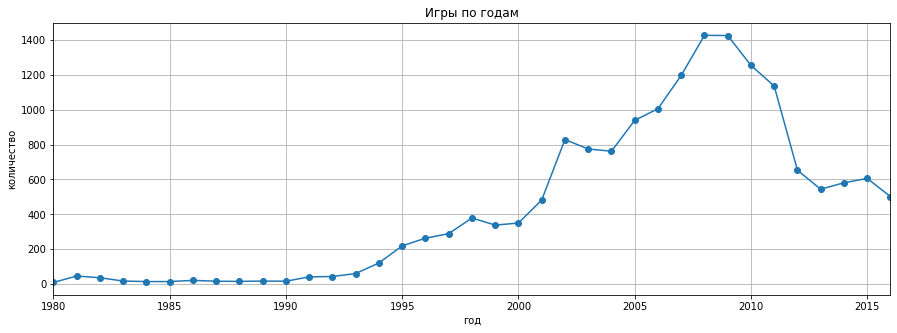

In [22]:
data.groupby('year_of_release')['name'].count().plot(x="year_of_release",style="-o",figsize=(15,5), grid=True)
plt.title('Игры по годам')
plt.xlabel('год')
plt.ylabel('количество')
plt.show()

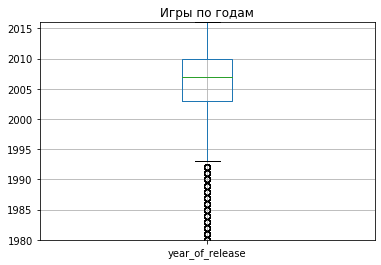

In [23]:
plt.ylim(1980, 2016) #построим диаграмму размаха
data.boxplot(column='year_of_release')
plt.title('Игры по годам')
plt.show()

Видим,что в давние времена игры выпускались в меньшем количестве. Рост игр начинается примерно с 1993 года,так что,то что было до него не важно. Пик приходится на 2002-2010 года.

- Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построем распределение по годам.

In [24]:
sales_platform = data.pivot_table(index='platform', values=['na_sales','eu_sales', 'jp_sales', 'other_sales', 'sales'],\
                                  aggfunc=('sum'))
sales_platform.T

platform,2600,3do,3ds,dc,ds,gb,gba,gc,gen,gg,...,sat,scd,snes,tg16,wii,wiiu,ws,x360,xb,xone
eu_sales,4.86,0.0,61.27,1.69,188.41,47.51,74.59,38.32,5.52,0.00,...,0.54,0.36,19.04,0.00,258.32,25.13,0.00,268.32,59.65,51.59
jp_sales,0.00,0.1,100.62,8.56,175.02,85.12,46.56,21.34,2.67,0.04,...,32.26,0.45,116.55,0.16,68.28,13.01,1.42,12.30,1.38,0.34
na_sales,80.78,0.0,82.65,5.43,380.31,113.64,184.12,131.94,19.27,0.00,...,0.72,1.00,61.23,0.00,486.87,38.10,0.00,595.74,182.06,93.12
other_sales,0.84,0.0,13.27,0.27,59.04,8.16,7.61,5.13,0.89,0.00,...,0.07,0.05,3.22,0.00,77.71,5.95,0.00,84.88,8.48,14.27
sales,86.48,0.1,257.81,15.95,802.78,254.43,312.88,196.73,28.35,0.04,...,33.59,1.86,200.04,0.16,891.18,82.19,1.42,961.24,251.57,159.32


Сделали переменную с устройствами и продажами.

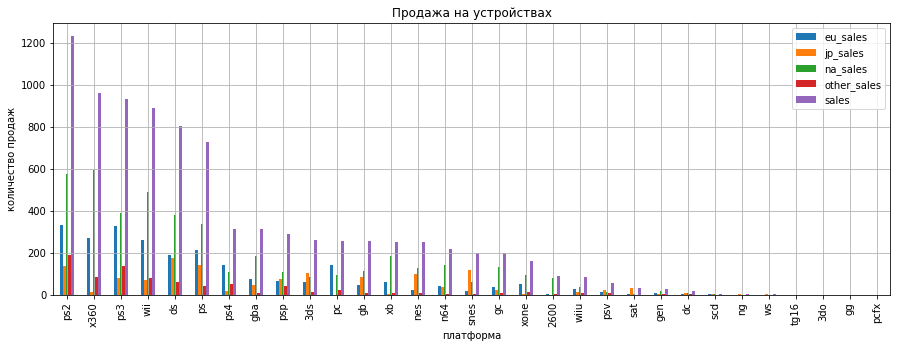

In [25]:
sales_platform.sort_values(by='sales',ascending=False).plot(kind='bar',figsize=(15,5), grid=True)
plt.title('Продажа на устройствах')
plt.xlabel('платформа')
plt.ylabel('количество продаж')
plt.show()

Больше всего продаж по всем регионам на платформе ps2.

Рассмотрим топ 6 игр по суммарным продажам и по годам,они явно выбиваются из общей кучи.

In [26]:
platform_grouped = data.pivot_table(index='platform', values='sales', aggfunc='sum').\
                                    sort_values(by='sales', ascending=False)
platform_grouped = platform_grouped.head(6).reset_index()
platform_grouped.style.background_gradient(cmap=cm)

,platform,sales
0,ps2,1233.56
1,x360,961.24
2,ps3,931.34
3,wii,891.18
4,ds,802.78
5,ps,727.58


Cоздадим словарь наиболее прибыльных платформ.

In [27]:
top_platforms = platform_grouped['platform'].unique()

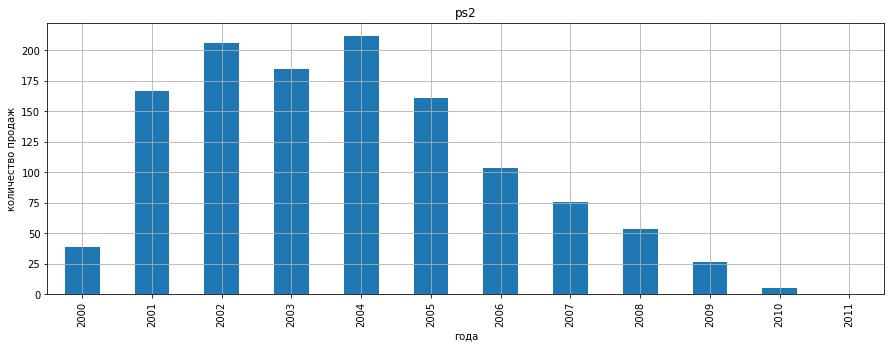

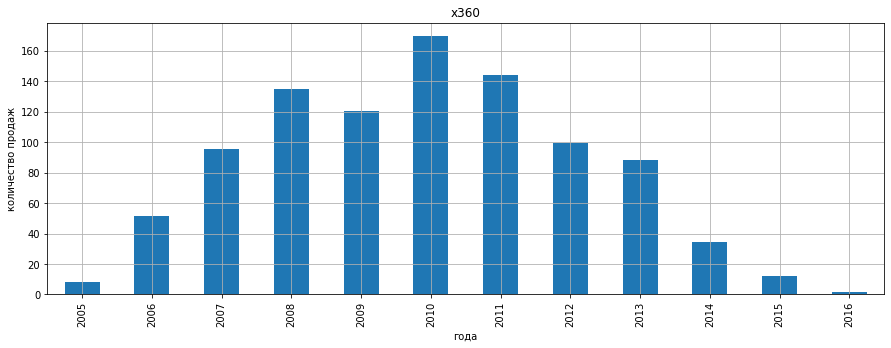

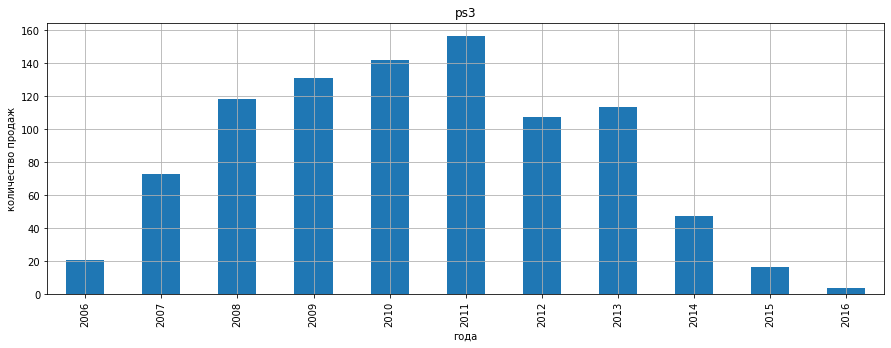

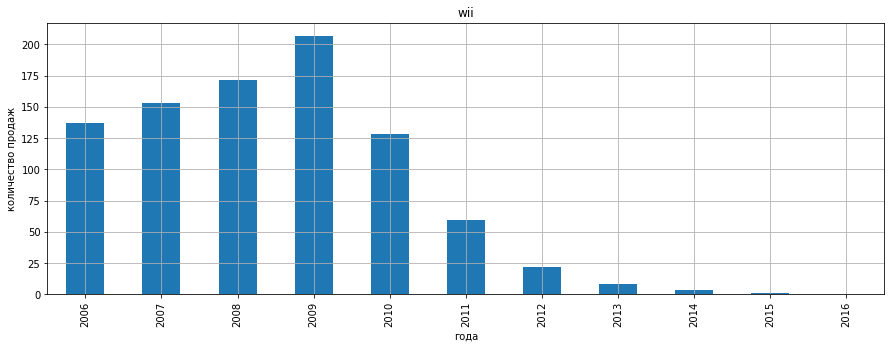

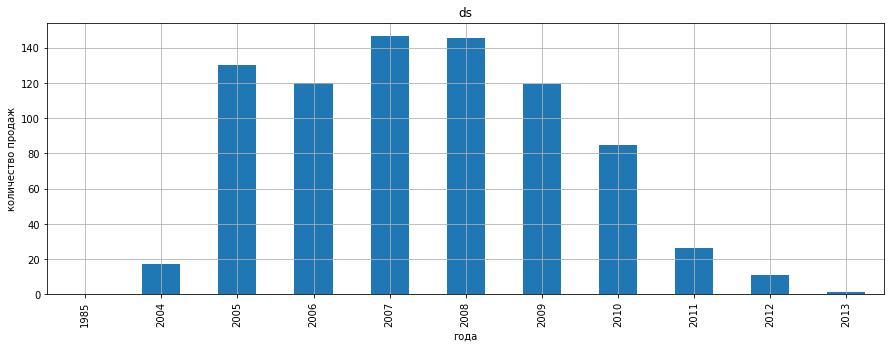

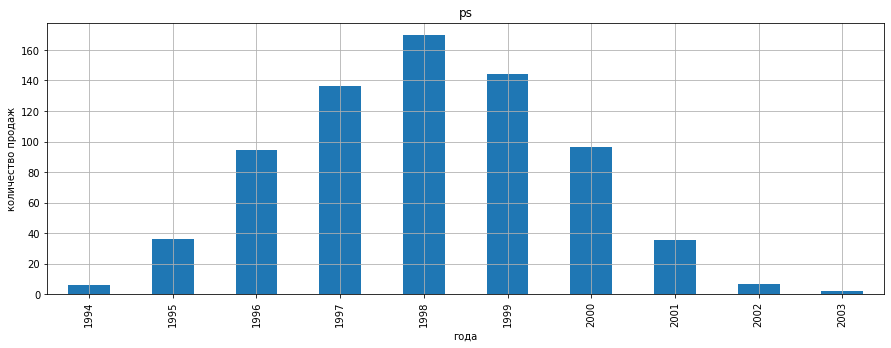

In [28]:
for platform in top_platforms:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='sales', aggfunc='sum').\
                                       plot(kind='bar', figsize=(15,5), legend=False, grid=True)
    plt.title(platform)
    plt.xlabel('года')
    plt.ylabel('количество продаж')
    plt.show()

Платформа ps2 12 лет продаж.Пик 2000-2009.

Платформа x360 12 лет продаж.Пик 2006-2014.

Платформа ps3 11 лет продаж.Пик 2007-2014.

Платформа wii 11 лет продаж. Пик 2006-2011.

Платформа ds 11лет продаж.Пик 2005-2011.

Платформа ps 10 лет продаж.Пик с 1995-2001.

Если рассматривать по моделям(как пример - ps)примерно каждые 6 лет появляется новая модель,когда начинает падать спрос на старую. Исчезают платформы примерно за 10-12 лет.

Две самые развивающиеся и перспективные платформы - ps4 и xone - в 2013 году только появились. А "раскрутились" вообще только в 2014. Поэтому возьмем данные за последний пятилетний период.Там будут самые актуальные данные для прогноза на 2017 год.

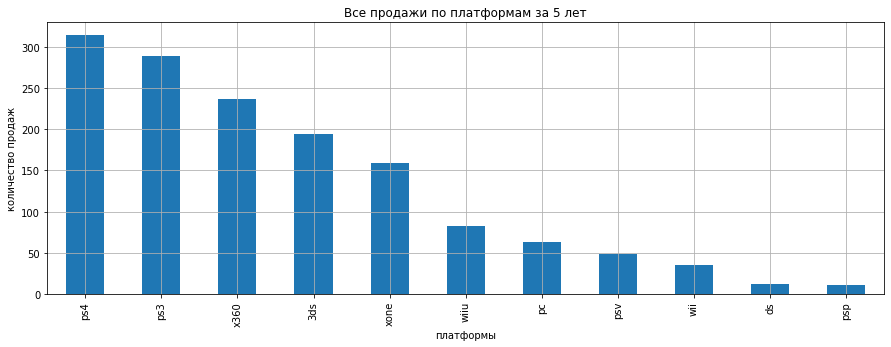

In [29]:
data_year_5 = data.query('year_of_release>=2012')
data_year_5.groupby('platform')['sales'].sum().sort_values(ascending=False).plot(figsize=(15,5),kind="bar", grid=True)
plt.title('Все продажи по платформам за 5 лет')
plt.xlabel('платформы')
plt.ylabel('количество продаж')
plt.show()

Топ 5 - ps4,ps3,x360,3ds,xone.

In [30]:
top_5_platform = data_year_5.pivot_table(index='platform', values='sales', aggfunc='sum').\
                                         sort_values(by='sales', ascending=False).head()
top_5_platform = top_5_platform.reset_index().rename_axis(None, axis=1)
top_5_platform.style.background_gradient(cmap=cm)

,platform,sales
0,ps4,314.14
1,ps3,288.79
2,x360,236.54
3,3ds,194.61
4,xone,159.32


Посмотрим,что творится за 2016 год.

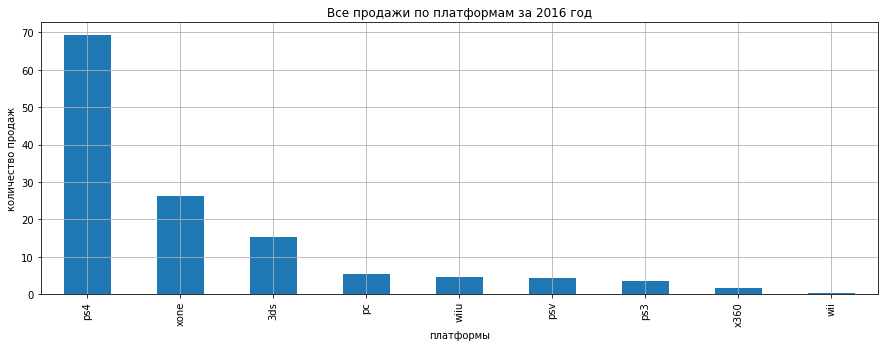

In [31]:
data_2016 = data.query('year_of_release==2016')
data_2016.groupby('platform')['sales'].sum().sort_values(ascending=False).plot(figsize=(15,5),kind="bar", grid=True)
plt.title('Все продажи по платформам за 2016 год')
plt.xlabel('платформы')
plt.ylabel('количество продаж')
plt.show()

Здесь лидер новая модель ps4,потом xone,3ds,pc,wiiu.

Создадим функцию для платформ 2016 года по годам и продажам.

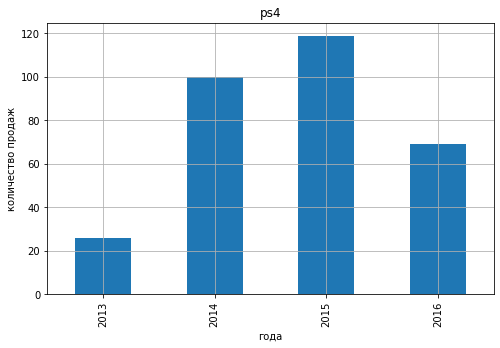

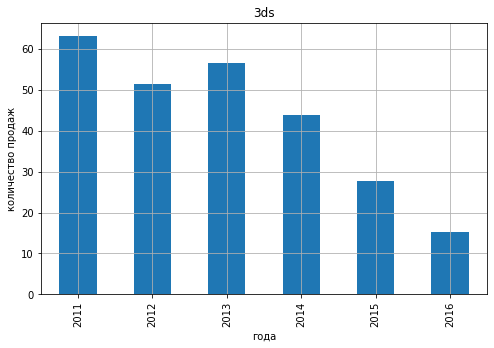

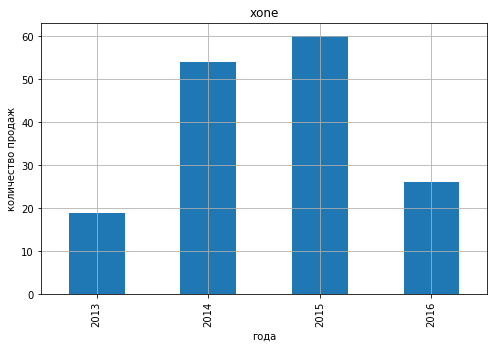

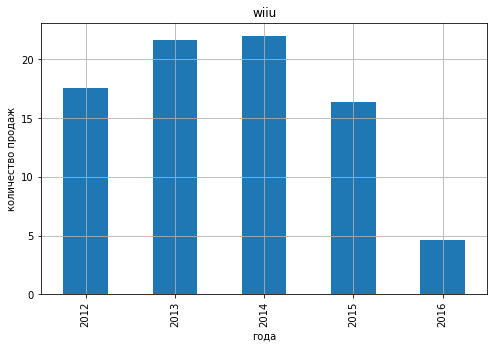

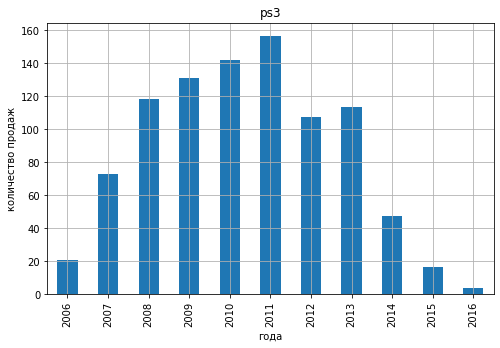

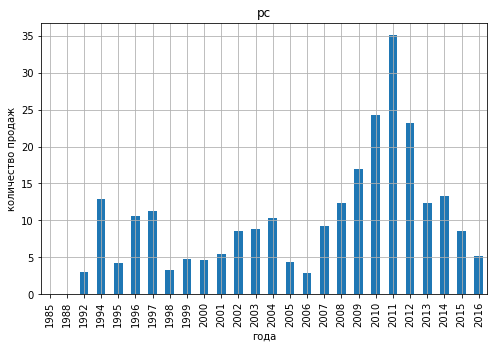

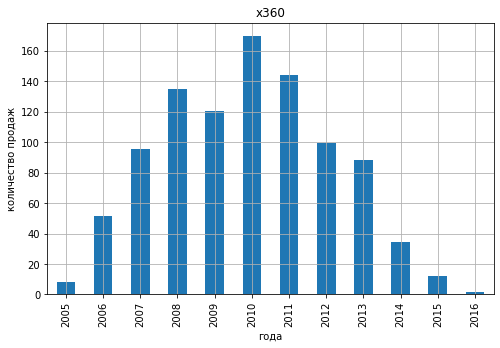

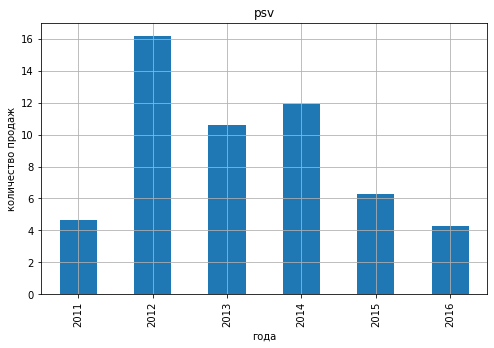

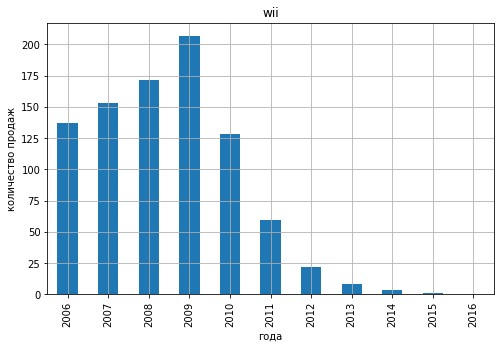

In [32]:
platform_2016 = data_2016['platform'].unique()

for platform in platform_2016:
    data[data['platform'] == platform].pivot_table(index='year_of_release', values='sales', aggfunc='sum')\
                                      .plot(figsize=(8,5),kind="bar", legend=False, grid=True)
    plt.title(platform)
    plt.xlabel('года')
    plt.ylabel('количество продаж')
    plt.show()    

1) ps4.Релиз в 2013 году,идет рост спроса,пик 2014-2015 года и после начинается спад.

2) 3ds.Релиз в 2011 году,высокий спрос до 2014,потом идет спад.

3) xone.Релиз в 2013 году.Пиковые года 2013-2014,после чего спад.

4) wiiu. Релиз в 2012 году,высокий спрос до 2015 и потом спад.

5) ps3.Релиз в 2006 году,пик 2008-2013 года,после чего идет спад.

6) ps.Релиз в 1985 году(рекордсмен по продолжительности).Видны росты и спады,пик 2010-2012 года,потом идет спад.

7) x360.Релиз в 2005 году.С 2007 года виден рост,пик 2007-2012 года,затем идет спад.

8) psv.Релиз в 2011 году.Пик 2012-2014 года,после спад.

9) wii.Релиз в 2006году.Пик за этот промежуток с 2006-2010 года и спад начинается с 2009 года.С 2014 года продажи стремятся кнулю.

Построим «ящик с усами» по глобальным продажам игр в разбивке по платформам за весь период.

In [33]:
data['sales'].describe().T

count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: sales, dtype: float64

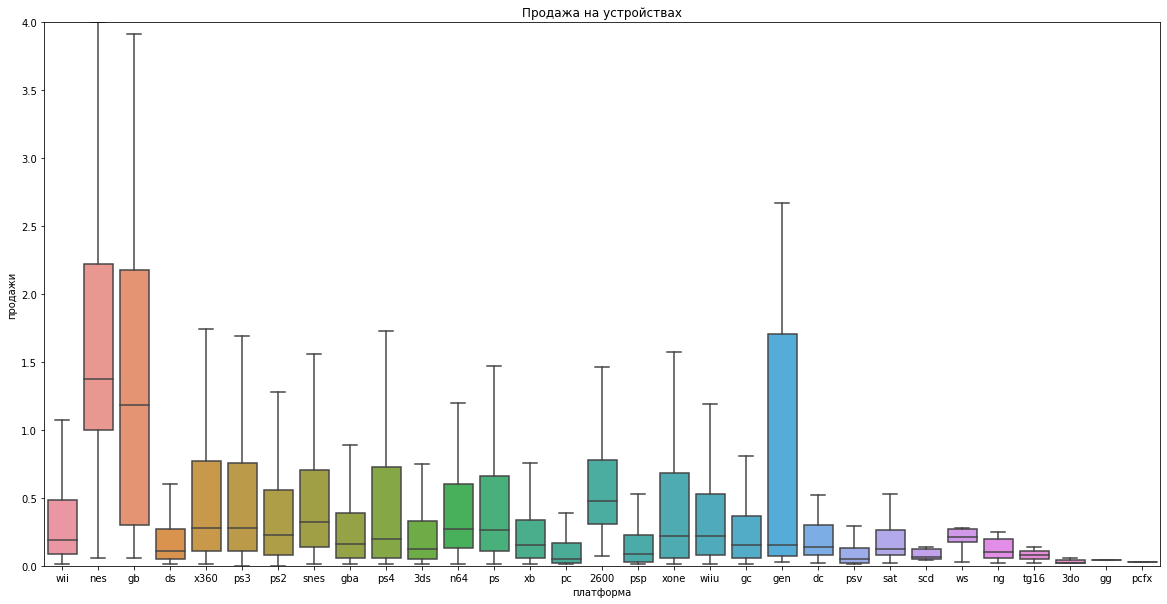

In [34]:
plt.figure(figsize=(20,10))
plt.ylim(0,4)
sns.boxplot(x='platform', y='sales', data=data, showfliers=False)
plt.title('Продажа на устройствах')
plt.xlabel('платформа')
plt.ylabel('продажи')
plt.show()

Бросаются в глаза платформы nes,gb,gen c большими ящиками.А еще платформы ps, ps2, ps3, ps4, x360,xone, wii, ds, 3ds с длинными усами(которые мы убрали).

Построим «ящик с усами» по глобальным продажам игр в разбивке по платформам за последний десятилетний период.

In [35]:
data_year_5['sales'].describe().T

count    2886.000000
mean        0.501223
std         1.249157
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: sales, dtype: float64

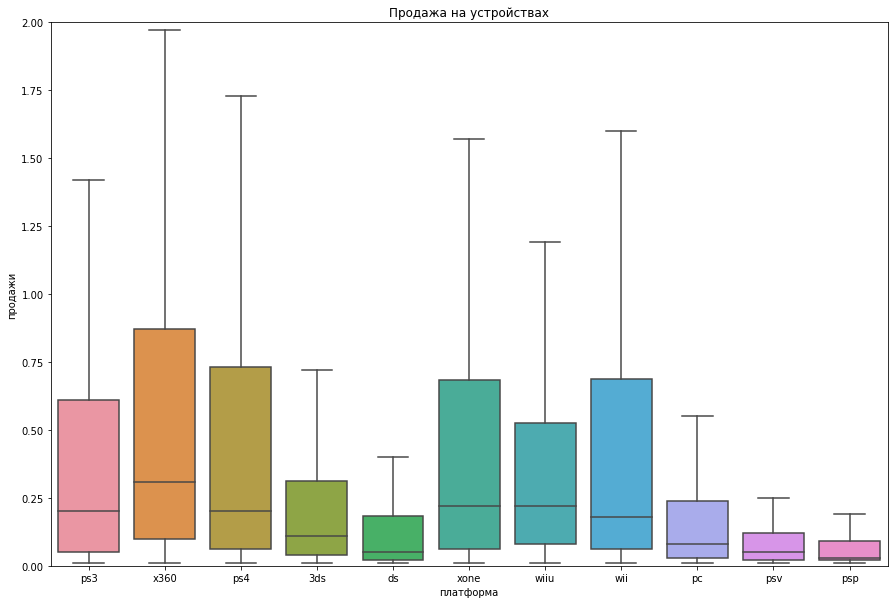

In [36]:
plt.figure(figsize=(15,10))
plt.ylim(0,2)
sns.boxplot(x='platform', y='sales',data=data_year_5, showfliers=False)
plt.title('Продажа на устройствах')
plt.xlabel('платформа')
plt.ylabel('продажи')
plt.show()

По медиане на первом месте x360,потом xone, wiiu, ps3,ps4. По сумме xone и ps4 - лидеры.

Создадим переменную с топ 5 платформ за последние 5 лет. Построим «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [37]:
list_top5 = ['ps3','x360','xone','3ds','ps4']
data_top5_platform = data_year_5[data_year_5['platform'].isin(['ps3','x360','xone','3ds','ps4'])]
data_top5_platform = data_top5_platform[data_top5_platform['sales']<35]
data_top5_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83.0,5.3,m,13.79


In [38]:
data_top5_platform.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,1820.0,2014.047253,1.389891,2012.00,2013.00,2014.00,2015.0000,2016.00
na_sales,1820.0,0.275055,0.668020,0.00,0.00,0.06,0.2600,9.66
eu_sales,1820.0,0.228956,0.608755,0.00,0.00,0.04,0.2000,9.09
jp_sales,1820.0,0.077445,0.281539,0.00,0.00,0.01,0.0600,4.39
other_sales,1820.0,0.074258,0.200763,0.00,0.00,0.02,0.0625,3.96
critic_score,1156.0,70.147491,12.701556,13.00,63.00,72.00,79.0000,97.00
user_score,1156.0,6.615441,1.500429,0.20,5.80,7.00,7.7000,9.20
sales,1820.0,0.655714,1.477562,0.01,0.06,0.19,0.6300,21.05


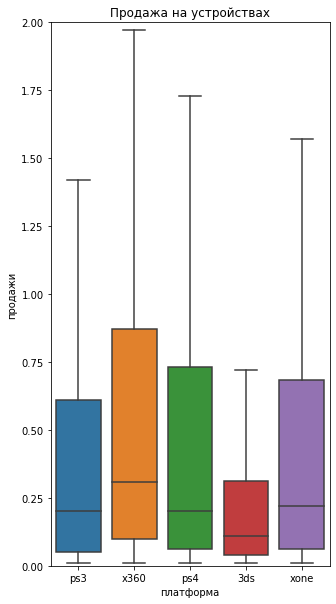

In [39]:
plt.figure(figsize=(5,10))
plt.ylim(0, 2)
sns.boxplot(data=data_top5_platform, x='platform', y='sales', showfliers=False)
plt.title('Продажа на устройствах')
plt.xlabel('платформа')
plt.ylabel('продажи')
plt.show()

In [40]:
top_5_platform.style.background_gradient(cmap=cm)

,platform,sales
0,ps4,314.14
1,ps3,288.79
2,x360,236.54
3,3ds,194.61
4,xone,159.32


топ 5 за последние 5 лет.

- Платформа ps4 на первом месте по общим продажам (314млн.),медиана  около 0.2,пик 0.06-0.74.Выбросы после 1.75.
- Платформа ps3 по общим продажам на втором месте(288млн.),медиана  около 0.2,пик 0.05-0.61.Выбросы после 1.43.
- Платформа x360 по общим продажам на третьем месте(236млн.),медиана  около 0.29,пик 0.09-0.87.Выбросы после 1.99.
- Платформа 3ds по общим продажам на четвертом месте(194млн.),медиана  около 0.1,пик 0.03-0.32.Выбросы после 0.29.
- Платформа xone по общим продажам на пятом месте(159млн.),медиана  около 0.22,пик 0.06-0.69.Выбросы после 1.58.



- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

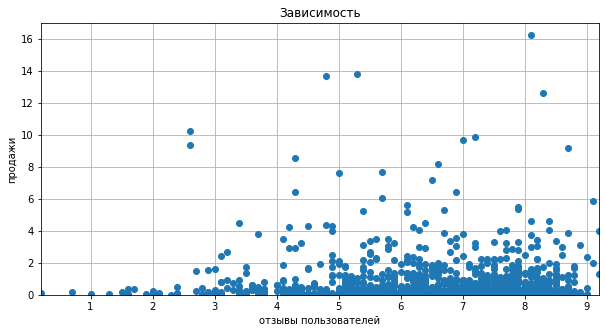

In [41]:
data_top5_platform.plot(x='user_score', y='sales', ylim=(0, 17), style='o', grid=True, figsize=(10, 5), legend=False)
plt.title('Зависимость')
plt.xlabel('отзывы пользователей')
plt.ylabel('продажи')
plt.show()

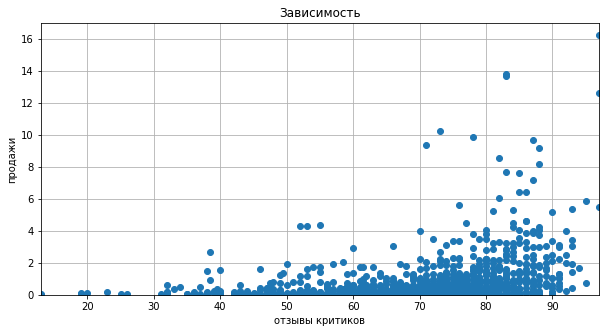

In [42]:
data_top5_platform.plot(x='critic_score', y='sales', ylim=(0, 17), style='o', grid=True, figsize=(10, 5), legend=False)
plt.title('Зависимость')
plt.xlabel('отзывы критиков')
plt.ylabel('продажи')
plt.show()

In [43]:
fool_score = ['user_score', 'critic_score', 'sales']
data_top5_platform[fool_score].corr()

,user_score,critic_score,sales
user_score,1.000000,0.591217,-0.012539
critic_score,0.591217,1.000000,0.332042
sales,-0.012539,0.332042,1.000000


Отзывы пользователей не влияют на глобальные продажи.

Отзывы критиков слабо влияют на глобальные продажи.

Видна зависимость между отзывами критиков и отзывами пользователей.

Рассмотрим топ 5 платформ за актуальный период.

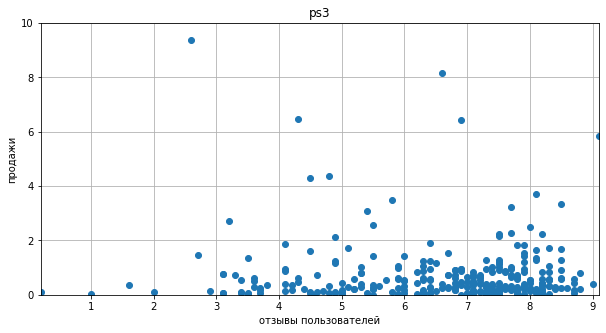

In [44]:
ps_3 = data_top5_platform.query('platform == "ps3"')
ps_3.plot(x='user_score', y='sales', ylim=(0, 10), style='o', grid=True, figsize=(10, 5), legend=False)
plt.title('ps3')
plt.xlabel('отзывы пользователей')
plt.ylabel('продажи')
plt.show()

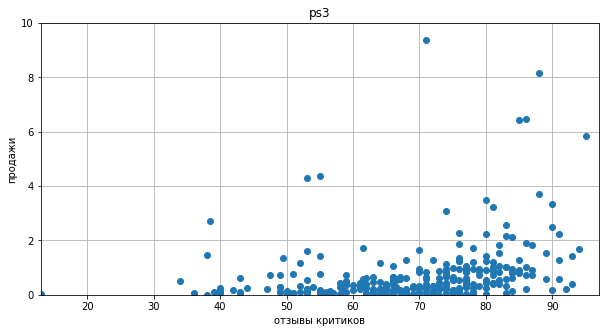

In [45]:
ps_3.plot(x='critic_score', y='sales', ylim=(0, 10), style='o', grid=True, figsize=(10, 5), legend=False)
plt.title('ps3')
plt.xlabel('отзывы критиков')
plt.ylabel('продажи')
plt.show()

In [46]:
ps_3[fool_score].corr()

,user_score,critic_score,sales
user_score,1.000000,0.606515,-0.018413
critic_score,0.606515,1.000000,0.281931
sales,-0.018413,0.281931,1.000000


Отзывы пользователей почти не влияют на продажи платформы ps3.
Отзывы критиков влияют на продажи платформы ps3.

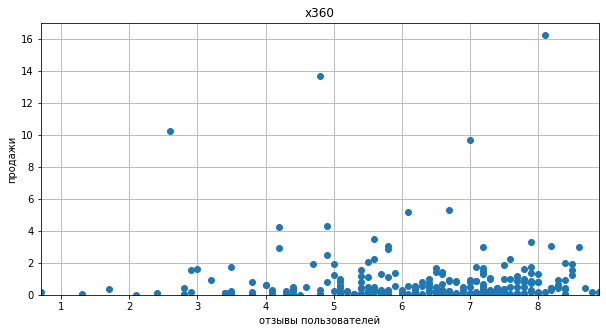

In [47]:
x_360 = data_top5_platform.query('platform == "x360"')
x_360.plot(x='user_score', y='sales', ylim=(0, 17), style='o', grid=True, figsize=(10, 5), legend=False)
plt.title('x360')
plt.xlabel('отзывы пользователей')
plt.ylabel('продажи')
plt.show()

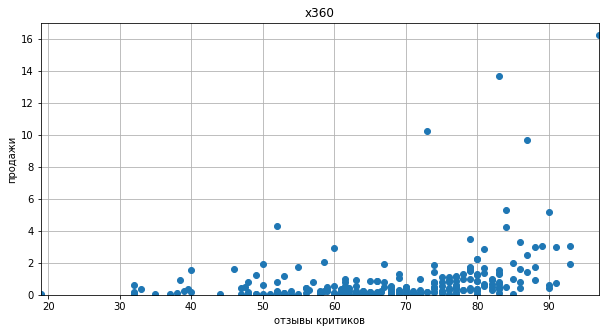

In [48]:
x_360.plot(x='critic_score', y='sales', ylim=(0, 17), style='o', grid=True, figsize=(10, 5), legend=False)
plt.title('x360')
plt.xlabel('отзывы критиков')
plt.ylabel('продажи')
plt.show()

In [49]:
x_360[fool_score].corr()

,user_score,critic_score,sales
user_score,1.000000,0.648915,-0.008317
critic_score,0.648915,1.000000,0.325210
sales,-0.008317,0.325210,1.000000


Отзывы пользователей почти не влияют на продажи платформы x360.
Отзывы критиков влияют на продажи платформы x360.

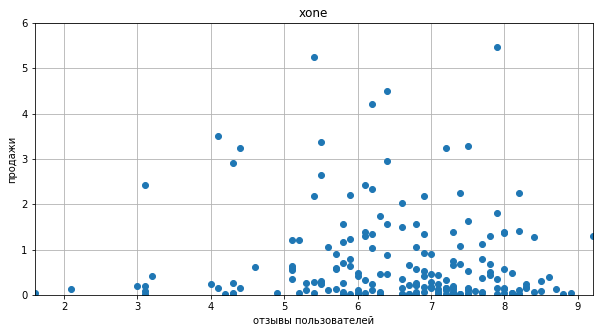

In [50]:
x_one = data_top5_platform.query('platform == "xone"')
x_one.plot(x='user_score', y='sales', ylim=(0, 6), style='o', grid=True, figsize=(10, 5), legend=False)
plt.title('xone')
plt.xlabel('отзывы пользователей')
plt.ylabel('продажи')
plt.show()

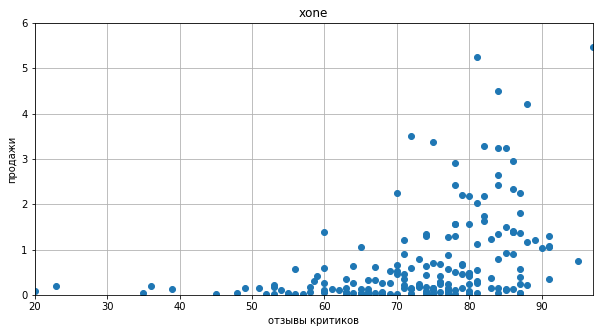

In [51]:
x_one.plot(x='critic_score', y='sales', ylim=(0, 6), style='o', grid=True, figsize=(10, 5), legend=False)
plt.title('xone')
plt.xlabel('отзывы критиков')
plt.ylabel('продажи')
plt.show()

In [52]:
x_one[fool_score].corr()

,user_score,critic_score,sales
user_score,1.000000,0.448726,-0.088554
critic_score,0.448726,1.000000,0.421009
sales,-0.088554,0.421009,1.000000


Отзывы пользователей не влияют на продажи платформы xone.
Отзывы критиков почти не влияют на продажи платформы xone.

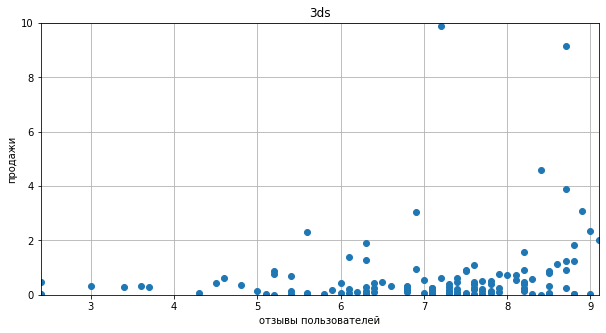

In [53]:
ds_3 = data_top5_platform.query('platform == "3ds"')
ds_3.plot(x='user_score', y='sales', ylim=(0, 10), style='o', grid=True, figsize=(10, 5), legend=False)
plt.title('3ds')
plt.xlabel('отзывы пользователей')
plt.ylabel('продажи')
plt.show()

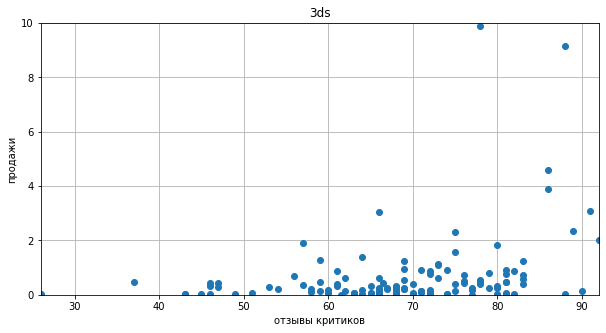

In [54]:
ds_3.plot(x='critic_score', y='sales', ylim=(0, 10), style='o', grid=True, figsize=(10, 5), legend=False)
plt.title('3ds')
plt.xlabel('отзывы критиков')
plt.ylabel('продажи')
plt.show()

In [55]:
ds_3[fool_score].corr()

,user_score,critic_score,sales
user_score,1.000000,0.755876,0.187240
critic_score,0.755876,1.000000,0.312056
sales,0.187240,0.312056,1.000000


Отзывы пользователей почти не влияют на продажи платформы 3ds.
Отзывы критиков влияют на продажи платформы 3ds.

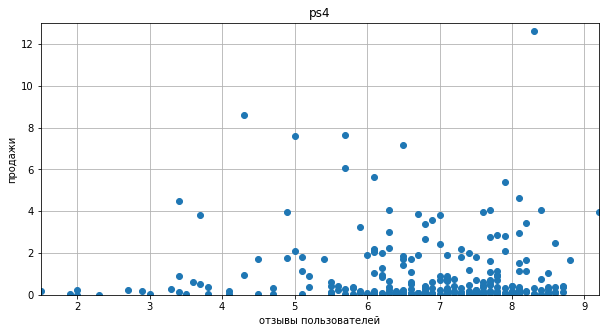

In [56]:
ps_4 = data_top5_platform.query('platform == "ps4"')
ps_4.plot(x='user_score', y='sales', ylim=(0, 13), style='o', grid=True, figsize=(10, 5), legend=False)
plt.title('ps4')
plt.xlabel('отзывы пользователей')
plt.ylabel('продажи')
plt.show()

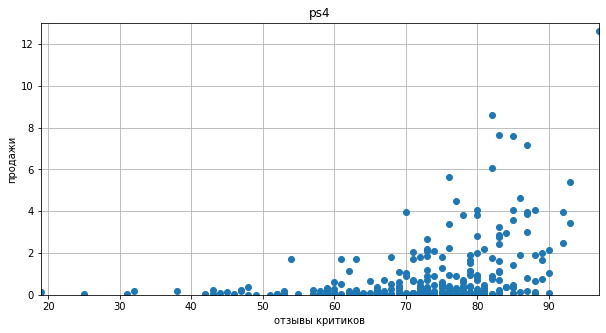

In [57]:
ps_4.plot(x='critic_score', y='sales', ylim=(0, 13), style='o', grid=True, figsize=(10, 5), legend=False)
plt.title('ps4')
plt.xlabel('отзывы критиков')
plt.ylabel('продажи')
plt.show()

In [58]:
ps_4[fool_score].corr()

,user_score,critic_score,sales
user_score,1.000000,0.562134,-0.038264
critic_score,0.562134,1.000000,0.406714
sales,-0.038264,0.406714,1.000000


Отзывы пользователей не влияют на продажи платформы ps4.
Отзывы критиков несильно влияют на продажи платформы ps4.

Если рассматривать каждую топовую платформу по отдельности,то можем сделать вывод,что отзывы критиков почти всегда влияют на продажи. А отзывы пользователей,бывает немного влияют на продажи. И всегда видна зависимость между отзывами критиков и пользователей.

- Посмотрим на общее распределение игр по жанрам.

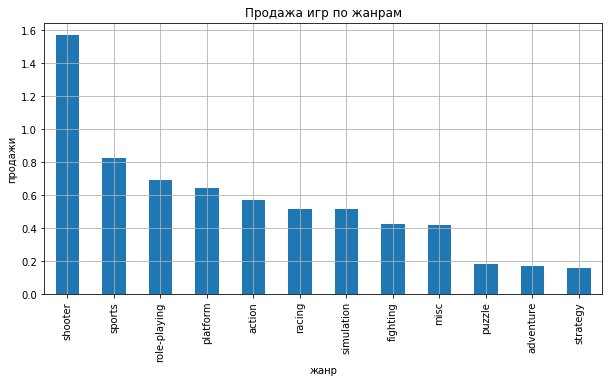

In [59]:
(data_top5_platform
    .pivot_table(index='genre', values='sales')
    .sort_values('sales', ascending=False)
    .plot(kind='bar', y='sales', figsize=(10, 5), legend=False, grid=True))
plt.title('Продажа игр по жанрам')
plt.xlabel('жанр')
plt.ylabel('продажи')
plt.show()

По продажам среди нашего топ 5 лидер жанр-shooter(на голову выше других жанров),потом идут sports,role-playing,platform,action. Меньше всего продаются puzzle,adventure,strategy.

## Составьте портрет пользователя каждого региона.

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Рассмотрим топ 5 платформ для каждого региона.

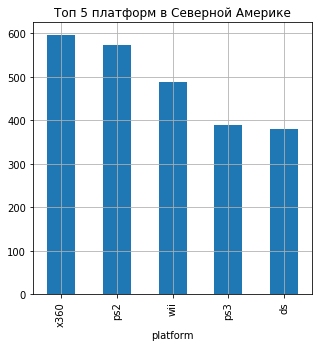

In [60]:
(data
     .groupby(by='platform')
     .agg({'na_sales':'sum'})
     .sort_values(by='na_sales', ascending=False).head()
     .plot(kind='bar', figsize=(5, 5), subplots=True, legend=False, grid=True))
plt.title('Топ 5 платформ в Северной Америке')
plt.show()

In [61]:
na = (data
     .groupby(by='platform')
     .agg({'na_sales':'sum'})
     .sort_values(by='na_sales', ascending=False).head())
na.style.background_gradient(cmap=cm)

,na_sales
platform,
x360,595.74
ps2,572.92
wii,486.87
ps3,390.13
ds,380.31


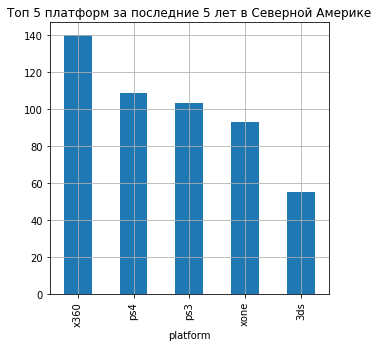

In [62]:
(data_top5_platform
     .groupby(by='platform')
     .agg({'na_sales':'sum'})
     .sort_values(by='na_sales', ascending=False).head()
     .plot(kind='bar', figsize=(5, 5), subplots=True, legend=False, grid=True))
plt.title('Топ 5 платформ за последние 5 лет в Северной Америке')
plt.show()

In [63]:
na_5 = (data_top5_platform
     .groupby(by='platform')
     .agg({'na_sales':'sum'})
     .sort_values(by='na_sales', ascending=False).head())
na_5.style.background_gradient(cmap=cm)

,na_sales
platform,
x360,140.05
ps4,108.74
ps3,103.38
xone,93.12
3ds,55.31


Северная Америка.

Если рассматривать глобальные платформы(за весь период),здесь видно,что приставки х360(595) и ps2(572) почти одинаковые показатели,потом идет с небольшим отставанием платформа wii(486),затем платформы ps3(390) и ds(380) тоже почти с одинаковыми показателями.

Если рассматривать последний пятилетний период,то явный лидер x360(140),потом ps4(108) c небольшим отставанием ps3(103),затем xone(93) и 3ds(55).

В обоих случаях любимчиком остается х360.

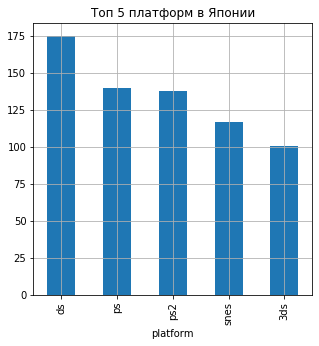

In [64]:
(data
     .groupby(by='platform')
     .agg({'jp_sales':'sum'})
     .sort_values(by='jp_sales', ascending=False).head()
     .plot(kind='bar', figsize=(5, 5), subplots=True, legend=False, grid=True))
plt.title('Топ 5 платформ в Японии')
plt.show()

In [65]:
jp = (data
     .groupby(by='platform')
     .agg({'jp_sales':'sum'})
     .sort_values(by='jp_sales', ascending=False).head())
jp.style.background_gradient(cmap=cm)

,jp_sales
platform,
ds,175.02
ps,139.78
ps2,137.54
snes,116.55
3ds,100.62


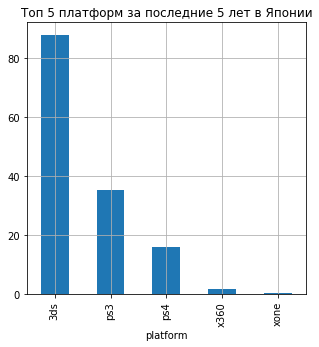

In [66]:
(data_top5_platform
     .groupby(by='platform')
     .agg({'jp_sales':'sum'})
     .sort_values(by='jp_sales', ascending=False).head()
     .plot(kind='bar', figsize=(5, 5), subplots=True, legend=False, grid=True))
plt.title('Топ 5 платформ за последние 5 лет в Японии')
plt.show()

In [67]:
jp_5 = (data_top5_platform
     .groupby(by='platform')
     .agg({'jp_sales':'sum'})
     .sort_values(by='jp_sales', ascending=False).head())
jp_5.style.background_gradient(cmap=cm)

,jp_sales
platform,
3ds,87.79
ps3,35.29
ps4,15.96
x360,1.57
xone,0.34


Япония.

По глобальным данным лидирует ds(175),потом идут ps(139) и ps2(137)-это одна приставка,только модель новее,потом snes(116) и 3ds(100).

За последние 5 лет топ открывают 3ds(87),потом ps3(35),потом ps4(15),за ним  мало продаж у x360(1.5) и почти нет у xone(0.3).

Здесь в обоих случаях любимчик ds,только в новой версии.

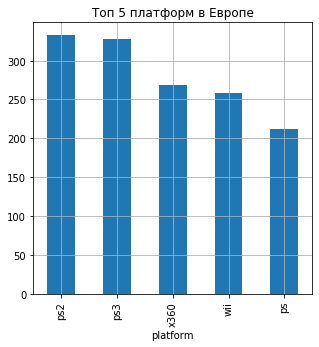

In [68]:
(data
    .groupby(by='platform')
    .agg({'eu_sales':'sum'})
    .sort_values(by='eu_sales', ascending=False).head()
    .plot(kind='bar', figsize=(5, 5), subplots=True, legend=False, grid=True))
plt.title('Топ 5 платформ в Европе')
plt.show()

In [69]:
eu = (data
    .groupby(by='platform')
    .agg({'eu_sales':'sum'})
    .sort_values(by='eu_sales', ascending=False).head())
eu.style.background_gradient(cmap=cm)

,eu_sales
platform,
ps2,332.63
ps3,327.21
x360,268.32
wii,258.32
ps,212.39


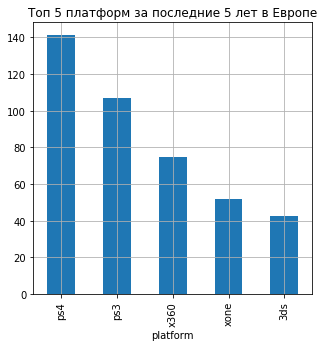

In [70]:
(data_top5_platform
    .groupby(by='platform')
    .agg({'eu_sales':'sum'})
    .sort_values(by='eu_sales', ascending=False).head()
    .plot(kind='bar', figsize=(5, 5), subplots=True, legend=False, grid=True))
plt.title('Топ 5 платформ за последние 5 лет в Европе')
plt.show()

In [71]:
eu_5 = (data_top5_platform
    .groupby(by='platform')
    .agg({'eu_sales':'sum'})
    .sort_values(by='eu_sales', ascending=False).head())
eu_5.style.background_gradient(cmap=cm)

,eu_sales
platform,
ps4,141.09
ps3,106.86
x360,74.52
xone,51.59
3ds,42.64


Европа.

По глобальным данным лидеры ps2(332) и ps3(327),потом идут x360(268) и wii(258),завершает топ 5 ps(212).

За последние 5 лет разница между платформами больше, первое место ps4(141),потом ps3(106),затем x360(74),xone(51) и 3ds(42).

В обоих случаях платформа ps с разными моделями лидирует.

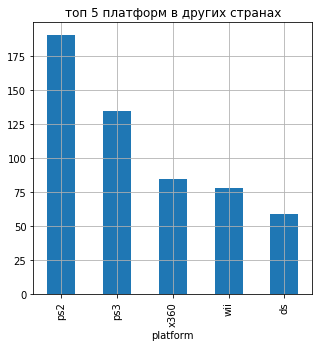

In [72]:
(data
    .groupby(by='platform')
    .agg({'other_sales':'sum'})
    .sort_values(by='other_sales', ascending=False).head()
    .plot(kind='bar', figsize=(5, 5), subplots=True, legend=False, grid=True))
plt.title('топ 5 платформ в других странах')
plt.show()

In [73]:
other = (data
    .groupby(by='platform')
    .agg({'other_sales':'sum'})
    .sort_values(by='other_sales', ascending=False).head())
other.style.background_gradient(cmap=cm)

,other_sales
platform,
ps2,190.47
ps3,134.59
x360,84.88
wii,77.71
ds,59.04


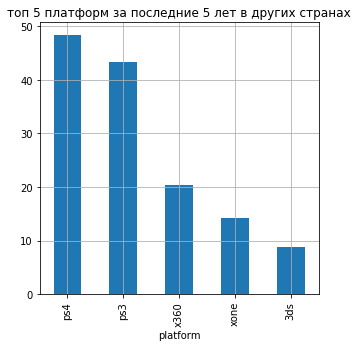

In [74]:
(data_top5_platform
    .groupby(by='platform')
    .agg({'other_sales':'sum'})
    .sort_values(by='other_sales', ascending=False).head()
    .plot(kind='bar', figsize=(5, 5), subplots=True, legend=False, grid=True))
plt.title('топ 5 платформ за последние 5 лет в других странах')
plt.show()

In [75]:
other_5 = (data_top5_platform
    .groupby(by='platform')
    .agg({'other_sales':'sum'})
    .sort_values(by='other_sales', ascending=False).head())
other_5.style.background_gradient(cmap=cm)

,other_sales
platform,
ps4,48.35
ps3,43.26
x360,20.4
xone,14.27
3ds,8.87


Рассмотрим заодно другие регионы.

Глобальный топ: ps2(190),ps3(134),x360(84),wii(77),ds(59).

Топ за последние 5 лет ps4(48),c небольшим разрывом ps3(43),x360(20),xone(14),3ds(8).

В обоих случаях платформа ps с разными моделями лидирует.

Рассмотрим топ 5 жанров для каждого региона.

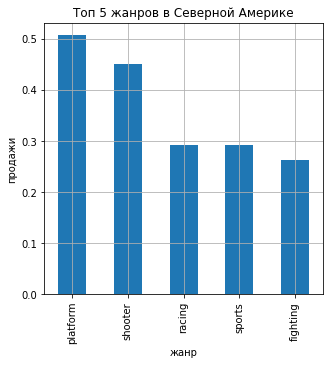

In [76]:
(data
    .pivot_table(index='genre', values='na_sales')
    .sort_values('na_sales', ascending=False).head()
    .plot(kind='bar', figsize=(5, 5), subplots=True, legend=False, grid=True))
plt.title('Топ 5 жанров в Северной Америке')
plt.xlabel('жанр')
plt.ylabel('продажи')
plt.show()

In [77]:
na_genre = (data
    .pivot_table(index='genre', values='na_sales')
    .sort_values('na_sales', ascending=False).head())
na_genre.style.background_gradient(cmap=cm)

,na_sales
genre,
platform,0.506196
shooter,0.451258
racing,0.291077
sports,0.291067
fighting,0.263453


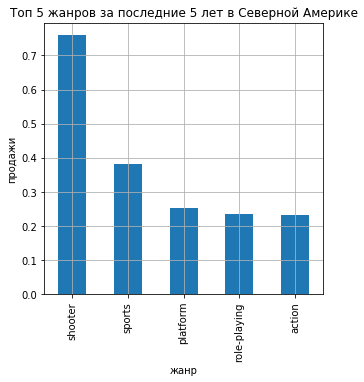

In [78]:
(data_top5_platform
    .pivot_table(index='genre', values='na_sales')
    .sort_values('na_sales', ascending=False).head()
    .plot(kind='bar', figsize=(5, 5), subplots=True, legend=False, grid=True))
plt.title('Топ 5 жанров за последние 5 лет в Северной Америке')
plt.xlabel('жанр')
plt.ylabel('продажи')
plt.show()

In [79]:
na5_genre = (data_top5_platform
    .pivot_table(index='genre', values='na_sales')
    .sort_values('na_sales', ascending=False).head())
na5_genre.style.background_gradient(cmap=cm)

,na_sales
genre,
shooter,0.7585
sports,0.382512
platform,0.252453
role-playing,0.236575
action,0.233592


Северная Америка.

Если рассматривать глобальные жанры(за весь период),здесь лидирует platform(0.506196),потом shooter(0.451258) и с небольшими отрывами жанры-racing(0.291077),sports(0.291067) и fighting(0.263453).

Если рассматривать последний пятилетний период,то явный лидер shooter(0.758500),за ним sports(0.382512),потом platform(0.252453) и c небольшой разницей role-playing(0.236575) и action(0.233592).

shooter остается один из любимых жанров.

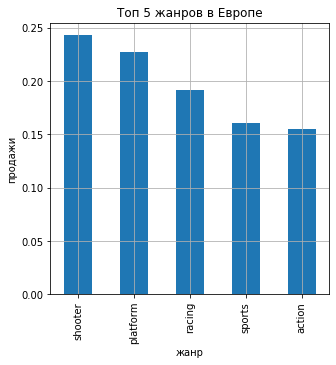

In [80]:
(data
    .pivot_table(index='genre', values='eu_sales')
    .sort_values('eu_sales', ascending=False).head()
    .plot(kind='bar', figsize=(5, 5), subplots=True, legend=False, grid=True))
plt.title('Топ 5 жанров в Европе')
plt.xlabel('жанр')
plt.ylabel('продажи')
plt.show()

In [81]:
eu_genre = (data
    .pivot_table(index='genre', values='eu_sales')
    .sort_values('eu_sales', ascending=False).head())
eu_genre.style.background_gradient(cmap=cm)

,eu_sales
genre,
shooter,0.242685
platform,0.227096
racing,0.191264
sports,0.161028
action,0.154518


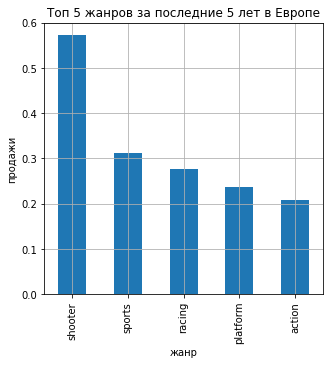

In [82]:
(data_top5_platform
    .pivot_table(index='genre', values='eu_sales')
    .sort_values('eu_sales', ascending=False).head()
    .plot(kind='bar', figsize=(5, 5), subplots=True, legend=False, grid=True))
plt.title('Топ 5 жанров за последние 5 лет в Европе')
plt.xlabel('жанр')
plt.ylabel('продажи')
plt.show()

In [83]:
eu5_genre = (data_top5_platform
    .pivot_table(index='genre', values='eu_sales')
    .sort_values('eu_sales', ascending=False).head())
eu5_genre.style.background_gradient(cmap=cm)

,eu_sales
genre,
shooter,0.5715
sports,0.311823
racing,0.276829
platform,0.236415
action,0.207778


Европа.

По глобальным данным на первом месте shooter(0.242685),потом с небольшим разрывом platform(0.227096),затем racing(0.191264) и с небольшой разницей sports(0.161028) и action(0.154518).

За последние 5 лет явный лидер shooter(0.571500),потом sports(0.311823),за ним racing(0.276829),затем platform(0.236415) и action(0.207778).

Со временем вкусы не поменялись,shooter-лидер.

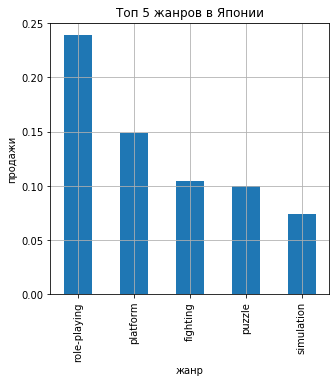

In [84]:
(data
    .pivot_table(index='genre', values='jp_sales')
    .sort_values('jp_sales', ascending=False).head()
    .plot(kind='bar', figsize=(5, 5), subplots=True, legend=False, grid=True))
plt.title('Топ 5 жанров в Японии')
plt.xlabel('жанр')
plt.ylabel('продажи')
plt.show()

In [85]:
jp_genre = (data
    .pivot_table(index='genre', values='jp_sales')
    .sort_values('jp_sales', ascending=False).head())
jp_genre.style.background_gradient(cmap=cm)

,jp_sales
genre,
role-playing,0.238616
platform,0.148872
fighting,0.104277
puzzle,0.0996134
simulation,0.074259


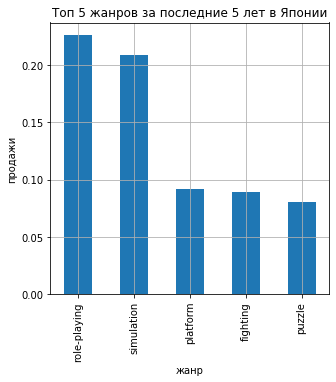

In [86]:
(data_top5_platform
    .pivot_table(index='genre', values='jp_sales')
    .sort_values('jp_sales', ascending=False).head()
    .plot(kind='bar', figsize=(5, 5), subplots=True, legend=False, grid=True))
plt.title('Топ 5 жанров за последние 5 лет в Японии')
plt.xlabel('жанр')
plt.ylabel('продажи')
plt.show()

In [87]:
jp5_genre = (data_top5_platform
    .pivot_table(index='genre', values='jp_sales')
    .sort_values('jp_sales', ascending=False).head())
jp5_genre.style.background_gradient(cmap=cm)

,jp_sales
genre,
role-playing,0.225982
simulation,0.208776
platform,0.0922642
fighting,0.0892771
puzzle,0.0806667


Япония.

По глобальным данным явный лидер role-playing(0.238616),потом platform(0.148872),за ним идут fighting(0.104277) и puzzle(0.099613) с небольшим разрывом и simulation(0.074259).

За последние 5 лет с большим отрывом жанры role-playing(0.225982) и simulation(0.208776),потом platform(0.092264) и fighting(0.089277) почти с одинаковыми показателями и puzzle(0.080667).

Со временем role-playing остается лидером.

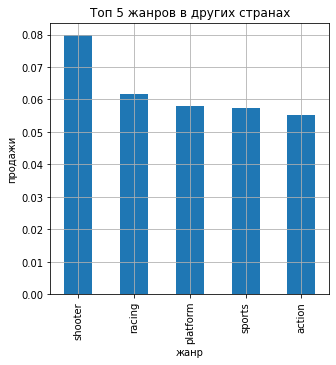

In [88]:
(data
    .pivot_table(index='genre', values='other_sales')
    .sort_values('other_sales', ascending=False).head()
    .plot(kind='bar', figsize=(5, 5), subplots=True, legend=False, grid=True))
plt.title('Топ 5 жанров в других странах')
plt.xlabel('жанр')
plt.ylabel('продажи')
plt.show()

In [89]:
other_genre = (data
    .pivot_table(index='genre', values='other_sales')
    .sort_values('other_sales', ascending=False).head())
other_genre.style.background_gradient(cmap=cm)

,other_sales
genre,
shooter,0.0797299
racing,0.0615905
platform,0.0580979
sports,0.057333
action,0.0551013


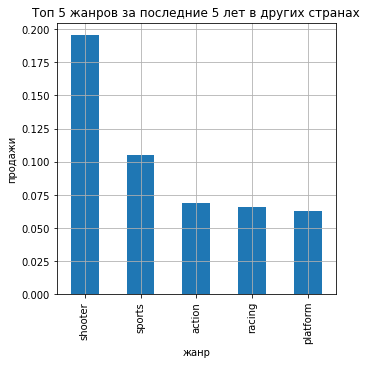

In [90]:
(data_top5_platform
    .pivot_table(index='genre', values='other_sales')
    .sort_values('other_sales', ascending=False).head()
    .plot(kind='bar', figsize=(5, 5), subplots=True, legend=False, grid=True))
plt.title('Топ 5 жанров за последние 5 лет в других странах')
plt.xlabel('жанр')
plt.ylabel('продажи')
plt.show()

In [91]:
other5_genre = (data_top5_platform
    .pivot_table(index='genre', values='other_sales')
    .sort_values('other_sales', ascending=False).head())
other5_genre.style.background_gradient(cmap=cm)

,other_sales
genre,
shooter,0.195167
sports,0.10468
action,0.0689802
racing,0.0658537
platform,0.0628302


Заодно рассмотрим другие страны.

По глобальным данным на первом месте shooter(0.079730),за ним с маленькими разрывами идут racing(0.061591),platform(0.058098),sports(0.057333),action(0.055101).

За последние 5 лет явный лидер  shooter(0.195167),потом sports(0.104680),за ним с небольшими отрывами идут platform(0.062830),racing(0.065854) и action(0.068980).

Со временем shooter остается любимым.

Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе.Рассмотрим по глобальным продажам,а затем за последние 10 лет.ESRB:

ec- от 3 лет;

е-от 6лет;

E10+-от 10 лет;

t-от 13 лет;

m-старше 17 лет;

ao-18+;

k-a - до 1998 года этот рейтинг назывался Дети для взрослых;

rp-игры, которые еще не были оценены.

Заменим пустые значения на +0+,потому что их много.

In [92]:
data['rating'] = data['rating'].fillna('+0+') 

In [93]:
rating_data = data.pivot_table(index = ['rating'], values = ['na_sales','jp_sales','eu_sales','other_sales'],\
                               aggfunc = ['sum'])
rating_data.style.background_gradient(cmap=cm)

По глобальным данным:

В Европе лидирует возрастная категория е(703.87),на последнем месте rp(0.03-незапоплненые) и ec(0.11) и присутствуют пустые значения +0+(609.65);

В Японии лидирует тоже возрастная категория е(197.96),совсем не пользуются спросом категории ao,ec,rp,самый маленький спрос k-a(1.46) и присутствуют пустые значения +0+(836.74);

В Северной Америке тоже е(1274.24),совсем не пользуются спросом категории rp,самый маленький спрос ao(1.26) и присутствуют пустые значения +0+(1225.84);

В других странах тоже е(231.54),самый маленький спрос rp(0.01-незапоплненые),k-a(0.03) и ec(0.11) и присутствуют пустые значения +0+(149.87).

По всем регионам лидирует категория е-от 6 лет,причем разрыв между последующими большой. И категория ec-от 3 лет наименьший спрос везде.Можем с уверенностью сказать,что рейтинг кампании ESRB влияет на продажи.Пропуски связаны скорей всего с годами,раньше меньше удиляли внимания категориям,потому что за последние 5 лет пустых значений нет.В Японии лидируют игры без рейтингов, и, скорее всего, это связано с тем, что в Японии своя система - Computer Entertainment Rating Organization (CERO), и в системе ESRB таким играм рейтинги не проставляются.

In [94]:
rating5_data = data_top5_platform.pivot_table(index = ['rating'],\
               values = ['na_sales','jp_sales','eu_sales','other_sales'], aggfunc = ['sum'])
rating5_data.style.background_gradient(cmap=cm)

За последние 5 лет:

В Европе лидирует возрастная категория m(172.57),потом e(91.71),потом t(41.78) и на последнем месте e10+(34.22);

В Японии лидирует тоже возрастная категория е(19.98),с маленьким разрывом t(19.51) и m(18.96),почти не пользуется спросом e10+(4.82);

В Северной Америке явный лидер m(214.11),за ним e(93.39),потом t(56.07) и e10+(47.99);

В других странах лидер m(58.43),потом е(26.74),за ним t(15.07) и e10+(11.23)

И за последние 5 лет в лидерах почти во всех регионах m-старше 17 лет и е-от 6 лет.И категория e10+-от 10 лет наименьший спрос везде.Со временем вкусы почти не меняются.Можем сказать,что рейтинг кампании ESRB влияет на продажи.

## Проверьте гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.

Поясните:

- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

In [95]:
data.dropna(subset=['user_score'],inplace=True)

In [96]:
xone_data = data.query('platform=="xone"')
pc_data = data.query('platform=="pc"')

mean_xone = xone_data['user_score'].mean()
print('Среднее значение пользовательского рейтинга платформы xone:{:.2f}'.format(mean_xone))

mean_pc = pc_data['user_score'].mean()
print('Среднее значение пользовательского рейтинга платформы pc:{:.2f}'.format(mean_pc))

Среднее значение пользовательского рейтинга платформы xone:6.57
Среднее значение пользовательского рейтинга платформы pc:7.09


In [97]:
variance_xone = np.var(xone_data['user_score'],ddof=1)
print('Дисперсия для платформы xone:{:.2f}'.format(variance_xone))

variance_pc=np.var(pc_data['user_score'],ddof=1)
print('Дисперсия для платформы pc:{:.2f}'.format(variance_pc))

Дисперсия для платформы xone:1.83
Дисперсия для платформы pc:2.23


In [98]:
standart_deviation_xone=np.sqrt(variance_xone)
print('Стандартное отклонение для платформы xone:{:.2f}'.format(standart_deviation_xone))

standart_deviation_pc=np.sqrt(variance_pc)
print('Стандартное отклонение для платформы pc:{:.2f}'.format(standart_deviation_pc))

Стандартное отклонение для платформы xone:1.35
Стандартное отклонение для платформы pc:1.49


In [99]:
genre_action = data.query('genre=="action"')
genre_sports = data.query('genre=="sports"')

mean_genre_action = genre_action['user_score'].mean()
print('Среднее значение пользовательского рейтинга жанров Action:{:.2f}'.format(mean_genre_action))

mean_genre_sports = genre_sports['user_score'].mean()
print('Среднее значение пользовательского рейтинга жанров Sports:{:.2f}'.format(mean_genre_sports))

Среднее значение пользовательского рейтинга жанров Action:7.03
Среднее значение пользовательского рейтинга жанров Sports:6.99


In [100]:
variance_genre_action = np.var(genre_action['user_score'],ddof=1)
print('Дисперсия для жанров Action:{:.2f}'.format(variance_genre_action))

variance_genre_sports=np.var(genre_sports['user_score'],ddof=1)
print('Дисперсия для жанров Sports:{:.2f}'.format(variance_genre_sports))

Дисперсия для жанров Action:1.75
Дисперсия для жанров Sports:2.05


In [101]:
standart_genre_action=np.sqrt(variance_genre_action)
print('Стандартное отклонение для жанров Action:{:.2f}'.format(variance_genre_action))

standart_genre_sports=np.sqrt(variance_genre_sports)
print('Стандартное отклонение для жанров Sports:{:.2f}'.format(variance_genre_sports))

Стандартное отклонение для жанров Action:1.75
Стандартное отклонение для жанров Sports:2.05


H0(нуливая гипотеза) - Средние пользовательские рейтинги платформ Xbox One и PC не различаются. уH1(альтернотивная гипотеза) - Средние пользовательские рейтинги платформ различаются. Пороговое значение alpha (критический уровень статистической значимости) зададим 5%.Признаю 5%-ю вероятность слишком малой и на этом основании отвергаете нулевую гипотезу.

In [102]:
alpha = 0.05

results = st.ttest_ind((data['platform'] == 'xone'), (data['platform'] == 'pc') & (data['user_score']))

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.2167380820590304e-87
Отвергаем нулевую гипотезу


Гипотеза H1 подтвердилась.Средние пользовательские рейтинги платформ различается и это не случайность.

H0(нуливая гипотеза) - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не различаются. уH1(альтернотивная гипотеза) - Средние пользовательские рейтинги жанров различаются. Пороговое значение alpha (критический уровень статистической значимости) зададим 5%.Признаю 5%-ю вероятность слишком малой и на этом основании отвергаете нулевую гипотезу.

In [103]:
alpha = 0.05

results = st.ttest_ind((data['genre'] == 'action'), (data['genre'] == 'sports') & (data['user_score']))

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  3.0513709457701534e-35
Отвергаем нулевую гипотезу


Гипотеза H1 подтвердилась.Средние пользовательские рейтинги жанров различается и это не случайность.

## Вывод

В давние времена игры выпускались в маленьких количествах.Рост пошел примерно с 1993 года,пик в 2002-2010 годах,после чего идет спад.

# Глобальный(за весь период) топ 10 платформ по сумме продаж:

1) Платформа ps2(1233) 12 лет продаж.Пик 2000-2009;

2) Платформа x360(961) 12 лет продаж.Пик 2006-2014;

3) Платформа ps3(931) 11 лет продаж.Пик 2007-2014;

4) Платформа wii(891) 11 лет продаж. Пик 2006-2011;

5) Платформа ds(802) 11лет продаж.Пик 2005-2011;

6) Платформа ps(727) 10 лет продаж.Пик с 1995-2001;

7) Платформа ps4(314) 4 года продаж(новичок);

8) Платформа gba(312) продажи 8 лет.Пик 2001-2005;

9) Платформа psp(289) продажи идут 12 лет.Пик 2005-2011;

10) Платформа 3ds(257) за 6 лет наблюдается спад.Пиковые годы 2011-2013.

Если рассматривать по моделям(как пример - ps)примерно каждые 6 лет появляется новая модель,когда начинает падать спрос на старую. Исчезают примерно за 10-12 лет.

# Топ 5 платформ по продажам за последние 5 лет:

1) ps4(314млн.):
- Релиз в 2013 году,идет рост спроса,пик 2014-2015 года и после начинается спад;
- медиана около 0.2,пик 0.06-0.74.Выбросы после 1.75.

2) ps3(288млн.):
- Релиз в 2006 году,пик 2008-2013 года,после чего идет спад;
- медиана около 0.2,пик 0.05-0.61.Выбросы после 1.43.

3) x360(236млн.):
- Релиз в 2005 году.С 2007 года виден рост,пик 2007-2012 года,затем идет спад и в 2016 году стремиться к нулю;
- медиана около 0.29,пик 0.09-0.87.Выбросы после 1.99.

4) 3ds(194млн.):
- Релиз в 2011 году,высокий спрос до 2014,потом идет спад;
- медиана около 0.1,пик 0.03-0.32.Выбросы после 0.29.

5) xone(159млн.):
- Релиз в 2013 году.Пиковые года 2013-2014,после чего спад;
- медиана около 0.22,пик 0.06-0.69.Выбросы после 1.58.

Если рассматривать платформы за 2016 год,то здесь явный лидер новая модель ps4,потом xone,3ds,pc,wiiu.

Если рассматривать каждую топовую платформу по отдельности,то можем сделать вывод,что отзывы критиков почти всегда влияют на продажи. А отзывы пользователей,бывает немного влияют на продажи. И всегда видна зависимость между отзывами критиков и пользователей.

# По глобальным(за весь период) продажам среди нашего топ 5 по жанрам

Лидеры:
- shooter(на голову выше других жанров),
- sports,
- role-playing,
- platform,
- action. 

Меньше всего продаются:
- puzzle,
- adventure,
- strategy.

### Портрет пользователя по продажам в регионах:

# Северная Америка:

Если рассматривать глобальные платформы(за весь период),здесь видно,что приставки х360(595) и ps2(572) почти одинаковые показатели,потом идет с небольшим отставанием платформа wii(486),затем платформы ps3(390) и ds(380) тоже почти с одинаковыми показателями.

Если рассматривать последний пятилетний период,то явный лидер x360(140),потом ps4(108) c небольшим отставанием ps3(103),затем xone(93) и 3ds(55).

В обоих случаях любимчиком остается х360.

# Япония:

По глобальным данным лидирует ds(175),потом идут ps(139) и ps2(137)-это одна приставка,только модель новее,потом snes(116) и 3ds(100).

За последние 5 лет топ открывают 3ds(87),потом ps3(35),потом ps4(15),за ним мало продаж у x360(1.5) и почти нет у xone(0.3).

Здесь в обоих случаях любимчик ds,только в новой версии.

# Европа:

По глобальным данным лидеры ps2(332) и ps3(327),потом идут x360(268) и wii(258),завершает топ 5 ps(212).

За последние 5 лет разница между платформами больше, первое место ps4(141),потом ps3(106),затем x360(74),xone(51) и 3ds(42).

В обоих случаях платформа ps с разными моделями лидирует.

# Другие регионы:

Глобальный топ: ps2(190),ps3(134),x360(84),wii(77),ds(59).

Топ за последние 5 лет ps4(48),c небольшим разрывом ps3(43),x360(20),xone(14),3ds(8).

В обоих случаях платформа ps с разными моделями лидирует.

### Портрет пользователя по жанрам в регионах:
                            
# Северная Америка.

Если рассматривать глобальные жанры(за весь период),здесь лидирует platform(0.506196),потом shooter(0.451258) и с небольшими отрывами жанры-racing(0.291077),sports(0.291067) и fighting(0.263453).

Если рассматривать последний пятилетний период,то явный лидер shooter(0.758500),за ним sports(0.382512),потом platform(0.252453) и c небольшой разницей role-playing(0.236575) и action(0.233592).

shooter остается один из любимых жанров.

# Европа.

По глобальным данным на первом месте shooter(0.242685),потом с небольшим разрывом platform(0.227096),затем racing(0.191264) и с небольшой разницей sports(0.161028) и action(0.154518).

За последние 5 лет явный лидер shooter(0.571500),потом sports(0.311823),за ним racing(0.276829),затем platform(0.236415) и action(0.207778).

Со временем вкусы не поменялись,shooter-лидер.

# Япония.

По глобальным данным явный лидер role-playing(0.238616),потом platform(0.148872),за ним идут fighting(0.104277) и puzzle(0.099613) с небольшим разрывом и simulation(0.074259).

За последние 5 лет с большим отрывом жанры role-playing(0.225982) и simulation(0.208776),потом platform(0.092264) и fighting(0.089277) почти с одинаковыми показателями и puzzle(0.080667).

Со временем role-playing остается лидером.

# Другие страны.

По глобальным данным на первом месте shooter(0.079730),потом с маленькими разрывами идут racing(0.061591),platform(0.058098),sports(0.057333),action(0.055101).

За последние 5 лет явный лидер shooter(0.195167),потом sports(0.104680),за ним с небольшими отрывами идут platform(0.062830),racing(0.065854) и action(0.068980).

Со временем shooter остается любимым.


### Категории за последние 5 лет:

# В Европе:

- лидирует возрастная категория m(172.57),потом e(91.71),
- на последнем месте e10+(34.22);

# В Японии:
- лидирует тоже возрастная категория е(19.98),с маленьким разрывом t(19.51) и m(18.96),
- почти не пользуется спросом e10+(4.82);

# В Северной Америке:
- явный лидер m(214.11),за ним e(93.39),
- самый маленький спрос e10+(47.99);

# В других странах:
- лидер тоже лидер m(58.43),
- самый маленький спрос e10+(11.23).

И за последние 5 лет в лидерах почти во всех регионах m-старше 17 лет и е-от 6 лет.И категория e10+-от 10 лет наименьший спрос везде.

## Общий вывод
# Успех в Европе:
- платформы ps4,ps3;
- жанры shooter и sports;
- возрастная категория m(старше 17 лет) и  е(от 6 лет).
# Успех в Северной Америке:
- платформы 3ds и ps3;
- жанры shooter и sports;
- возрастная категория m(старше 17 лет) и  е(от 6 лет).
# Успех для Японии:
- платформы x360 и ps4;
- жанры role-playing и simulation;
- возрастная категория е(от 6 лет),t(от 13 лет) и m(старше 17 лет).

Естественно нужно не забывать про усовершенствованные модели.Новое всегда лучше старого).